# Paired Sample T-test : 전후 차이 비교

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

In [3]:
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
font_location = "C:/Windows/Fonts/NanumBarunGothic.ttf"

In [5]:
font_name = font_manager.FontProperties(fname=font_location).get_name()
print(font_name)

NanumBarunGothic


In [6]:
rc('font', family="NanumBarunGothic")

## 전후 차이 비교를 위한 데이터(생생정보통, 수요미식회, 맛있는녀석들) 전처리

In [21]:
df1 = pd.read_csv('raw_data/2017_tidy.csv')
df2 = pd.read_csv('raw_data/2018_tidy.csv')

In [22]:
df1.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동,0,1
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동,0,1
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동,1,0
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동,0,1
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동,0,1


In [23]:
df2.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후
0,생생정보,전주회관식당,2018-01-02,2018-01-02,1월 2일 생생정보 <mark>전주회관식당</mark> 더덕 흑돼지 구이 전북 진안,"http://iampenguin.tistory.com/77""",0,진안,0,1
1,생생정보,전주회관식당,2018-01-02,2018-01-02,마이산 맛집 <mark>전주회관식당</mark> 더덕 흑돼지구이 생생정보,"http://meokja.tistory.com/760""",0,진안,0,1
2,생생정보,전주회관식당,2018-01-02,2018-01-02,생생정보통 더덕흑돼지구이 여기 이슈있슈 2TV 생생정보 1월2일 전라북도 진안 <m...,"http://mylovegae.tistory.com/2843""",0,진안,0,1
3,생생정보,전주회관식당,2018-01-02,2018-01-02,생생정보 더덕 흑돼지구이 1월 2일 여기 있슈 식당가 전북 진안군 맛집 <mark>...,"http://timemit.tistory.com/785""",0,진안,0,1
4,생생정보,전주회관식당,2018-01-02,2018-01-02,"2TV생생정보, 소원 명당 마이산 탑사 가는길 더덕 흑돼지구이 맛집 <mark>전주...","http://postnow.tistory.com/2142""",0,진안,0,1


In [24]:
df = pd.concat([df1, df2], sort=False)

In [25]:
df.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동,0,1
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동,0,1
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동,1,0
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동,0,1
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동,0,1


In [26]:
df.to_csv('raw_data/total.csv', index=False)

In [21]:
paired = pd.DataFrame(df.groupby('식당')['방영전', '방영후'].sum()).reset_index()

In [22]:
paired.head()

,식당,방영전,방영후
0,136생고기,4,45
1,3일한우국밥,35,51
2,가람떡갈비,21,50
3,가마솥 족발,31,106
4,가마솥손두부,11,45


In [23]:
paired.loc[paired['방영전']-paired['방영후'] > 0]

,식당,방영전,방영후
33,그릭슈바인,76,60
75,도마,16,14
80,동명항게찜,173,167
83,두메향기 산,106,60
93,류재은베이커리,246,226
104,메이탄,504,496
149,사돈집,103,66
169,속씨원한 대구탕,97,93
183,스앤샤 홍대본점,41,27
184,시내식당,45,42


In [24]:
paired[['방영전','방영후']].describe()

,방영전,방영후
count,320.000000,320.000000
mean,31.753125,72.156250
std,55.632062,74.622439
min,0.000000,0.000000
25%,5.000000,30.000000
50%,13.000000,48.500000
75%,32.250000,92.250000
max,504.000000,576.000000


**평균값을 보았을 때, 방영전후 차이가 있음**

### outlier 확인

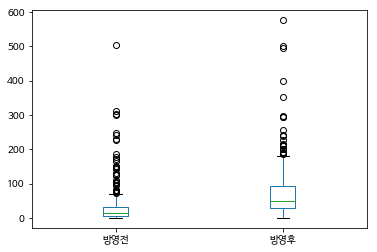

In [25]:
paired[['방영전', '방영후']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('paired_t-test_tidy_boxplot_outliers.png')

outlier 처리

In [30]:
paired1 = paired.loc[(paired['방영전']<120)&(paired['방영후']<120)]

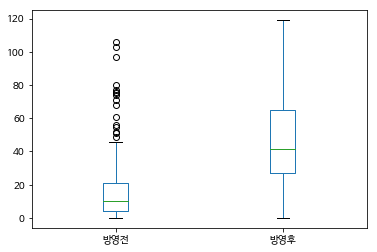

In [31]:
paired1[['방영전', '방영후']].plot(kind='box')

In [32]:
paired1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 319
Data columns (total 3 columns):
식당     270 non-null object
방영전    270 non-null int64
방영후    270 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.4+ KB


### 정규성 검정

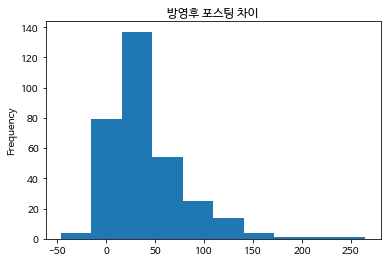

In [33]:
paired['post_diff'] = paired['방영후'] - paired['방영전']

paired['post_diff'].plot(kind='hist', title= '방영후 포스팅 차이')

Text(0.5,1,'Posting Difference Q-Q Plot')

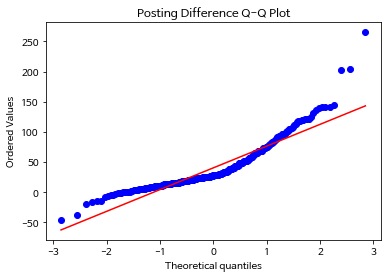

In [34]:
stats.probplot(paired['post_diff'], plot= plt)
plt.title('Posting Difference Q-Q Plot')

In [35]:
stats.shapiro(paired['post_diff'])

(0.8607400059700012, 2.384282867677384e-16)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


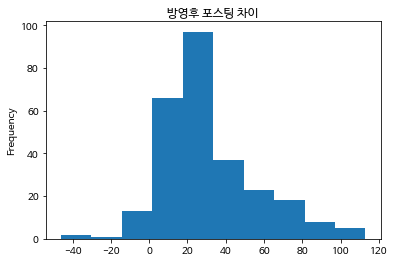

In [36]:
paired1['post_diff'] = paired1['방영후'] - paired1['방영전']

paired1['post_diff'].plot(kind='hist', title= '방영후 포스팅 차이')


(0.935321569442749, 1.7257973938811233e-09)

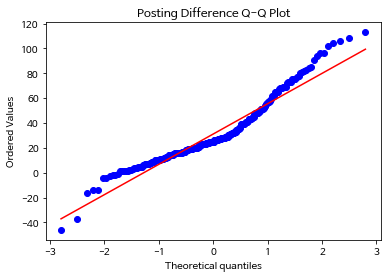

In [37]:
stats.probplot(paired1['post_diff'], plot= plt)
plt.title('Posting Difference Q-Q Plot')

stats.shapiro(paired1['post_diff'])

**정규성은 만족 안하지만 데이터가 많으므로(>30) 일단 정규성을 가정하고 넘어가자..**

## Paired sample t-test

In [38]:
stats.ttest_rel(paired['방영전'], paired['방영후'])

Ttest_relResult(statistic=-18.694270089130175, pvalue=3.4895190993811927e-53)

In [39]:
stats.ttest_rel(paired1['방영전'], paired1['방영후'])

Ttest_relResult(statistic=-20.429200173294046, pvalue=1.2016002204114699e-56)

**pvalue < 0.05이므로 맛집 프로그램 방영전과 방영후 포스팅 차이가 있다고 말할 수 있음**